# Convolutions
Sean Wade

In [2]:
import numpy
from matplotlib import pyplot as plt
from gradient_check import *
from scipy.signal import convolve2d

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [200]:
def conv_forward(x, w, b, pad=0, stride=1):
    """
    A naive implementation of the forward pass for a convolutional layer.

    The input consists of B batch size, each with D depth/channels, height H and width
    W. We convolve each input with F different filters, where each filter spans
    all D depth/chanals and has height HH and width HH.

    Input:
    - x: Input data of shape (B, D, H, W)
    - k: Filter weights of shape (F, D, HH, WW)
    - b: Biases, of shape (F,)
    - stride: The number of pixels between adjacent receptive fields in the
      horizontal and vertical directions.
    - pad: The number of pixels that will be used to zero-pad the input.

    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
    H' = 1 + (H + 2 * pad - HH) / stride
    W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, stride, pad)
    """
    B, D, H, W = x.shape
    F, DD, HH, WW = w.shape
    if D != DD:
        raise ValueError("Input and kernal depth must be same dimensions.")

    H_out = 1 + (H + 2 * pad - HH) / stride
    W_out = 1 + (W + 2 * pad - WW) / stride

    out = np.zeros((B, F, H_out, W_out))

    # padding with 0's
    x_data = np.pad(x, ((0,0),(0,0),(pad,pad),(pad,pad)), 'constant', constant_values=0)
    _, _, H, W = x_data.shape

    # convolving
    for i in range(B):
        for yy, j in enumerate(range(0, H-HH+1, stride)):
            for xx, k in enumerate(range(0, W-WW+1, stride)):
                x_rf = x_data[i, :, j:j+HH, k:k+WW]
                for f in range(F):
                    conv_value = np.sum(x_rf * w[f]) + b[f]
                    out[i, f, yy, xx] = conv_value


    cache = (x, w, b, stride, pad)
    return out, cache

In [5]:
def conv_forward_scipy(x, w, b):
    """
    An implementation of convolution using scipys 2dconv.

    The input consists of B batch size, each with D depth/channels, height H and width
    W. We convolve each input with F different filters, where each filter spans
    all D depth/chanals and has height HH and width HH.

    Args:
      x: Input data of shape (B, D, H, W)
      k: Filter weights of shape (F, D, HH, WW)
      b: Biases, of shape (F,)
     
    Returns:
      out: Output data, of shape (N, F, H', W')
      cache: (x, w, b)
    """
    B, D, H, W = x.shape
    F, DD, HH, WW = w.shape
    if D != DD:
        raise ValueError("Input and kernal depth must be same dimensions.")
        
    H_out = 1 + H - HH
    W_out = 1 + W - WW

    # convolving
    out = np.zeros((B, F, H_out, W_out))
    for bs in range(B):
        for d in range(D):
            for f in range(F):
                out[bs,f,:,:] = convolve2d(x[bs,d], w[f,d], mode='valid')+ b[f]
      
    cache = (x, w, b)
    return out, cache

In [6]:
def conv_forward_scipy(x, w, b):
    """
    An implementation of convolution using scipys 2dconv.

    The input consists of B batch size, each with D depth/channels, height H and width
    W. We convolve each input with F different filters, where each filter spans
    all D depth/chanals and has height HH and width HH.

    Args:
      x: Input data of shape (B, D, H, W)
      k: Filter weights of shape (F, D, HH, WW)
      b: Biases, of shape (F,)
     
    Returns:
      out: Output data, of shape (N, F, H', W')
      cache: (x, w, b)
    """
    B, D, H, W = x.shape
    F, DD, HH, WW = w.shape
    if D != DD:
        raise ValueError("Input and kernal depth must be same dimensions.")
        
    H_out = 1 + H - HH
    W_out = 1 + W - WW

    # convolving
    out = np.zeros((B, F, H_out, W_out))
    for bs in range(B):
        for d in range(D):
            for f in range(F):
                out[bs,f,:,:] = convolve2d(x[bs,d], w[f,d], mode='valid')+ b[f]
      
    cache = (x, w, b)
    return out, cache

In [7]:
def conv_backward(dout, cache):
    x, w, b = cache
    B, D, H, W = x.shape
    F, DD, HH, WW = w.shape
        
    B, F, Hdout, Wdout = dout.shape

    H_out = 1 + H - HH
    W_out = 1 + W - WW
    
    db = np.zeros((b.shape))
    for i in range(F):
        db[i] = np.sum(dout[:, i, :, :])
        
    dw = np.zeros((F, D, HH, WW))
    for i in range(0, F):
        for j in range(0, D):
            for k in range(0, HH):
                for l in range(0, WW):
                    dw[i, j, k, l] = np.sum(dout[:, i, :, :] * x_with_pad[:, j, k:k + Hdout * stride:stride, \
                                                                          l:l + Wdout * stride:stride])
                    
    dx = np.zeros((B, D, H, W))
    for bs in range(B):
        for d in range(D):
            for f in range(F):
                convolve2d(x[bs,d], dout[])
        

    return dx, dw, db



SyntaxError: invalid syntax (<ipython-input-7-0db5e1eefe2b>, line 26)

In [8]:
def conv_backward(dout, cache):
    x, w, b, stride, pad = cache
    B, D, H, W = x.shape
    F, DD, HH, WW = w.shape
    
    x_with_pad = np.pad(x, ((0,0),(0,0),(pad,pad),(pad,pad)), 'constant', constant_values=0)
    
    B, F, Hdout, Wdout = dout.shape

    H_out = 1 + (H + 2 * pad - HH) / stride
    W_out = 1 + (W + 2 * pad - WW) / stride
    
    db = np.zeros((b.shape))
    for i in range(0, F):
        db[i] = np.sum(dout[:, i, :, :])
        
    dw = np.zeros((F, D, HH, WW))
    for i in range(0, F):
        for j in range(0, D):
            for k in range(0, HH):
                for l in range(0, WW):
                    dw[i, j, k, l] = np.sum(dout[:, i, :, :] * x_with_pad[:, j, k:k + Hdout * stride:stride, \
                                                                          l:l + Wdout * stride:stride])
                    
    dx = np.zeros((B, D, H, W))
    for nprime in range(B):
        for i in range(H):
            for j in range(W):
                for f in range(F):
                    for k in range(Hdout):
                        for l in range(Wdout):
                            mask1 = np.zeros_like(w[f, :, :, :])
                            mask2 = np.zeros_like(w[f, :, :, :])
                            if (i + pad - k * stride) < HH and (i + pad - k * stride) >= 0:
                                mask1[:, i + pad - k * stride, :] = 1.0
                            if (j + pad - l * stride) < WW and (j + pad - l * stride) >= 0:
                                mask2[:, :, j + pad - l * stride] = 1.0

                            w_masked = np.sum(w[f, :, :, :] * mask1 * mask2, axis=(1, 2))
                            dx[nprime, :, i, j] += dout[nprime, f, k, l] * w_masked

    return dx, dw, db



In [9]:
# Test Gradient
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)

dx_num = eval_numerical_gradient_array(lambda x: conv_forward(x, w, b, pad=1)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward(x, w, b, pad=1)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward(x, w, b, pad=1)[0], b, dout)

out, cache = conv_forward(x, w, b, pad=1)
dx, dw, db = conv_backward(dout, cache)

rel_error = lambda dx, dx_num: abs(dx_num - dx) / (abs(dx_num) + abs(dx))

# Your errors should be around 1e-9'
print 'Testing conv_backward_naive function'
print 'dx error: ', rel_error(dx, dx_num)
print 'dw error: ', rel_error(dw, dw_num)
print 'db error: ', rel_error(db, db_num)

Testing conv_backward_naive function
dx error:  [[[[  6.25008292e-12   5.93247454e-11   1.78095141e-11   1.05093374e-11
      5.60847298e-13]
   [  1.39246667e-11   1.72123191e-11   3.11898899e-11   1.02574026e-11
      8.92286158e-12]
   [  4.57354785e-10   2.51340440e-11   1.84275079e-11   6.33881582e-12
      1.27875942e-11]
   [  2.58463256e-10   1.90168863e-10   1.20587129e-11   7.90724382e-12
      2.64208094e-11]
   [  6.52212484e-11   1.03776872e-10   1.50975006e-11   5.08916453e-12
      6.22283952e-12]]

  [[  1.11371520e-12   2.00103629e-11   1.64509398e-11   2.31251560e-11
      1.77619865e-11]
   [  1.80773527e-11   2.39212078e-11   2.20824410e-11   6.94130774e-11
      8.73993994e-11]
   [  1.44140200e-10   5.34140447e-12   8.78552489e-12   3.98166815e-11
      6.14666458e-11]
   [  5.46125344e-11   6.01998570e-12   3.55171504e-11   1.37520246e-11
      8.22943603e-11]
   [  1.77226334e-11   8.04255654e-11   1.97059303e-10   9.86644305e-12
      6.42413119e-12]]

  [[  1.

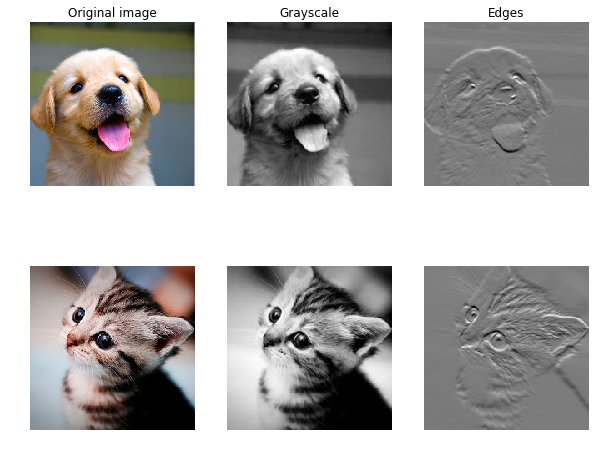

In [10]:
from scipy.misc import imread, imresize

kitten, puppy = imread('images/cat.jpg'), imread('images/dog.jpg')
# kitten is wide, and puppy is already square
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d/2:-d/2, :]

img_size = 200
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(kitten_cropped, (img_size, img_size)).transpose((2, 0, 1))

# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = np.array([0, 128])

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = conv_forward_scipy(x, w, b)

def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_noax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_noax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_noax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_noax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_noax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_noax(out[1, 1])
plt.show()

## Better Convolutional Algorithms

<img src="images/im2col.png">
<img src="images/im2colmult.png">

In [204]:
def im2col(x, HH, WW, pad=0, stride=1):
    """
    Returns:
      (K**2 * c by B matrix)
    """
    B, D, H, W = x.shape
    
    x_padded = np.pad(x, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')

    #H_out = (H + 2 * pad - HH) / stride + 1
    #W_out = (W + 2 * pad - WW) / stride + 1
    
    H_out = 1 + (H + 2 * pad - HH) / stride
    W_out = 1 + (W + 2 * pad - WW) / stride
    

    i0 = np.repeat(np.arange(HH), WW)
    i0 = np.tile(i0, D)
    i1 = stride * np.repeat(np.arange(H_out), W_out)
    j0 = np.tile(np.arange(WW), HH * D)
    j1 = stride * np.tile(np.arange(W_out), H_out)
    
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)
    k = np.repeat(np.arange(D), HH * WW).reshape(-1, 1)

    cols = x_padded[:, k, i, j]
    cols = cols.transpose(1, 2, 0).reshape(HH * WW * D, -1)
    return cols

In [205]:
def col2im(cols, x_shape, HH=3, WW=3, pad=1,
                   stride=1):
    """ An implementation of col2im based on fancy indexing and np.add.at """
    B, D, H, W = x_shape
    H_padded, W_padded = H + 2 * pad, W + 2 * pad
    x_padded = np.zeros((B, D, H_padded, W_padded), dtype=cols.dtype)
    
    # H_out = (H + 2 * pad - HH) / stride + 1
    # W_out = (W + 2 * pad - WW) / stride + 1
    
    H_out = 1 + (H + 2 * pad - HH) / stride
    W_out = 1 + (W + 2 * pad - WW) / stride

    i0 = np.repeat(np.arange(HH), WW)
    i0 = np.tile(i0, D)
    i1 = stride * np.repeat(np.arange(H_out), W_out)
    j0 = np.tile(np.arange(WW), HH * D)
    j1 = stride * np.tile(np.arange(W_out), H_out)
    
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)
    k = np.repeat(np.arange(D), HH * WW).reshape(-1, 1)
    
    cols_reshaped = cols.reshape(D * HH * WW, -1, B)
    cols_reshaped = cols_reshaped.transpose(2, 0, 1)
    np.add.at(x_padded, (slice(None), k, i, j), cols_reshaped)
    
    if padding == 0:
        return x_padded
    return x_padded[:, :, padding:-padding, padding:-padding]


In [207]:
# In layers 
def conv_im2col(x, k, b, pad, stride):
    B, D, H, W = x.shape
    F, D, HH, WW = k.shape
   
    # Check dimensions
    assert (W + 2 * pad - WW) % stride == 0, 'width does not work'
    assert (H + 2 * pad - HH) % stride == 0, 'height does not work'
    
    #H_out = (H + 2 * pad - HH) / stride + 1
    #W_out = (W + 2 * pad - WW) / stride + 1
    
    H_out = 1 + (H + 2 * pad - HH) / stride
    W_out = 1 + (W + 2 * pad - WW) / stride
    
    out = np.zeros((B, F, H_out, W_out), dtype=x.dtype)
    
    x_cols = im2col(x, HH, WW, pad, stride)
    # flatten kernal
    result = k.reshape((F, -1)).dot(x_cols) #+ b.reshape(-1, 1)
    out = result.reshape(F, H_out, W_out, B)
    out = out.transpose(3, 0, 1, 2)
    
    cache = (x, w, b, pad, stride, x_cols)
    return out, cache

def conv_im2col_backward(dout, cache):
    x, k, b, pad, stride, x_cols = cache
    
    db = np.sum(dout, axis=(0, 2, 3))

    F, D, HH, WW = k.shape
    dout_reshaped = dout.transpose(1, 2, 3, 0).reshape(F, -1)
    dw = dout_reshaped.dot(x_cols.T).reshape(k.shape)

    dx_cols = k.reshape(F, -1).T.dot(dout_reshaped)
    dx = col2im(dx_cols, x.shape, HH, WW, pad, stride)

    return dx, dw, db

## Comparison

In [196]:
k = np.ones((64, 3, 3, 3))
b = np.ones((64, 1))

In [202]:
%%timeit
cols = conv_forward(x, k, b, 1, 0)

1 loop, best of 3: 42.2 s per loop


In [208]:
%%timeit
cols = conv_im2col(x, k, b, 0, 1)

10 loops, best of 3: 65.7 ms per loop


In [198]:
%%timeit
cols = conv_forward_scipy(x, k, b)

1 loop, best of 3: 700 ms per loop


Sources:

[1] https://petewarden.com/2015/04/20/why-gemm-is-at-the-heart-of-deep-learning/

[2] http://cs231n.stanford.edu/slides/winter1516_lecture11.pdf